In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#Importing the dataset
precipitation=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/Precipitation/Precipitation.csv")

In [3]:
precipitation

,Year,Month,Precipitation_past,Precipitation_pasttopast,Precipitation
0,2002,1,0.60,0.15,2.38
1,2002,2,0.00,7.33,0.22
2,2002,3,0.17,0.60,0.62
3,2002,4,14.73,3.74,4.28
4,2002,5,20.62,56.82,36.25
...,...,...,...,...,...
211,2019,8,4.53,158.06,40.58
212,2019,9,1.98,205.18,197.04
213,2019,10,0.74,127.22,124.80
214,2019,11,0.44,1.73,17.29


In [4]:
precipitation.shape

(216, 5)

In [5]:
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
Year                        216 non-null int64
Month                       216 non-null int64
Precipitation_past          216 non-null float64
Precipitation_pasttopast    216 non-null float64
Precipitation               216 non-null float64
dtypes: float64(3), int64(2)
memory usage: 8.6 KB


In [6]:
#Creating correlation matrix for precipitation
corr_matrix=precipitation.corr()
corr_matrix

,Year,Month,Precipitation_past,Precipitation_pasttopast,Precipitation
Year,1.000000,0.000000,-0.044505,0.037767,-0.007101
Month,0.000000,1.000000,0.257592,0.267777,0.231468
Precipitation_past,-0.044505,0.257592,1.000000,0.725064,0.655949
Precipitation_pasttopast,0.037767,0.267777,0.725064,1.000000,0.701112
Precipitation,-0.007101,0.231468,0.655949,0.701112,1.000000


In [7]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

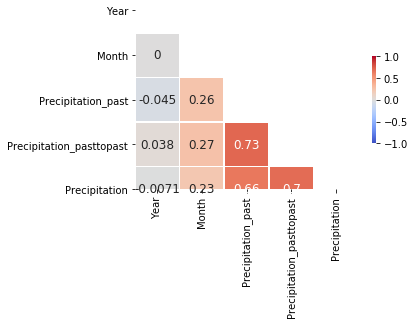

In [8]:
f, ax = plt.subplots(figsize=(5, 4)) 
heatmap = sns.heatmap(corr_matrix, mask = mask,square = True,linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},vmin = -1, vmax = 1,annot = True,annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [9]:
precipitation=precipitation.drop(['Year'],axis=1)

In [10]:
precipitation.shape

(216, 4)

In [11]:
X=precipitation.drop('Precipitation',axis=1)
y=precipitation.Precipitation

In [12]:
X

,Month,Precipitation_past,Precipitation_pasttopast
0,1,0.60,0.15
1,2,0.00,7.33
2,3,0.17,0.60
3,4,14.73,3.74
4,5,20.62,56.82
...,...,...,...
211,8,4.53,158.06
212,9,1.98,205.18
213,10,0.74,127.22
214,11,0.44,1.73


In [13]:
y

0        2.38
1        0.22
2        0.62
3        4.28
4       36.25
        ...  
211     40.58
212    197.04
213    124.80
214     17.29
215      2.68
Name: Precipitation, Length: 216, dtype: float64

In [14]:
X.shape

(216, 3)

In [15]:
y.shape

(216,)

In [16]:
#Creating Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [17]:
X_train,y_train=np.array(X_train),np.array(y_train)

### Linear Regressor

In [18]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [19]:
li=LinearRegression()

In [20]:
li.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Prediction of values
Lir_ypred= li.predict(X_test)
Lir_ypred

array([ 13.05331324, 196.58348373,  84.45964323,   8.94922084,
         9.39760379,  23.00307742,  13.64154253, 138.15317899,
       103.84957394, 122.71664814,  65.33871282, 104.10646816,
        50.44453903,   9.66337655, 103.87185514,   9.44893349,
         9.28222125,  18.15412733, 144.70545042,  22.99145893,
        12.65822537, 128.28389403])

In [22]:
#print('Mean Absolute Error:',mean_absolute_error(y_test,Lir_ypred))
print('Mean squared Error:',mean_squared_error(y_test,Lir_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lir_ypred)))
#print('R2_Score:',r2_score(y_test,Lir_ypred))

Mean squared Error: 1594.3859628917596
Root Mean Squared Error: 39.929762870467435


In [23]:
linear_r2_score=r2_score(y_test,Lir_ypred)
linear_r2_score

0.7001757609861422

### Lasso Regressor

In [24]:
#Lasso Regressor
lass=Lasso(alpha=0.0001)
lass.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
Lass_ypred= lass.predict(X_test)

In [26]:
print('Mean squared Error:',mean_squared_error(y_test,Lass_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,Lass_ypred)))
#print('R2_Score:',r2_score(y_test,Lass_ypred))

Mean squared Error: 1594.3863320547782
Root Mean Squared Error: 39.92976749312195


In [27]:
lasso_r2_score=r2_score(y_test,Lass_ypred)
lasso_r2_score

0.7001756915650461

### Ridge Regressor

In [28]:
#RIdge
rid=Ridge(alpha=0.0001)
rid.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
rid_ypred= rid.predict(X_test)

In [30]:
print('Mean squared Error:',mean_squared_error(y_test,rid_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rid_ypred)))
#print('R2_Score:',r2_score(y_test,rid_ypred))

Mean squared Error: 1594.3859635630142
Root Mean Squared Error: 39.92976287887287


In [31]:
ridge_r2_score=r2_score(y_test,rid_ypred)
ridge_r2_score

0.7001757608599128

### Decision Tree Regressor

In [32]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [33]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [34]:
dt_ypred= dt.predict(X_test)

In [35]:
print('Mean squared Error:',mean_squared_error(y_test,dt_ypred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dt_ypred)))
#print('R2_Score:',r2_score(y_test,dt_ypred))

Mean squared Error: 2362.687816193182
Root Mean Squared Error: 48.60748724418062


In [36]:
decisiontree_r2_score=r2_score(y_test,dt_ypred)
decisiontree_r2_score

0.5556966173782566

### KNeighbour Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=1)
kn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [38]:
kn1_pred=kn.predict(X_test)

In [39]:
print('Mean squared Error:',mean_squared_error(y_test,kn1_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,kn1_pred)))
#print('R2_Score:',r2_score(y_test,kn1_pred))

Mean squared Error: 1292.7316772727272
Root Mean Squared Error: 35.95457797378141


In [40]:
kneighbour_r2_score=r2_score(y_test,kn1_pred)
kneighbour_r2_score

0.7569018415814311

### SVR Regressor

In [41]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:
print('Mean squared Error:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))
#print('R2_Score:',r2_score(y_test,svr_pred))

Mean squared Error: 9819.001506118917
Root Mean Squared Error: 99.09087498916799


In [43]:
svr_r2_score=r2_score(y_test,svr_pred)
svr_r2_score

-0.846462978831362

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);

In [46]:
rf_pred=rf.predict(X_test)

In [47]:
print('Mean squared Error:',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rf_pred)))
#print('R2_Score:',r2_score(y_test,rf_pred))

Mean squared Error: 1666.8589022464148
Root Mean Squared Error: 40.82718337390439


In [48]:
randomforest_r2_score=r2_score(y_test,rf_pred)
randomforest_r2_score

0.6865472266181549

### Bayes Regressor

In [49]:
from sklearn.linear_model import BayesianRidge
br=BayesianRidge()
br.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [50]:
br_pred=br.predict(X_test)

In [51]:
print('Mean squared Error:',mean_squared_error(y_test,br_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,br_pred)))
print('R2_Score:',r2_score(y_test,br_pred))

Mean squared Error: 1609.7310514662856
Root Mean Squared Error: 40.12145375564407
R2_Score: 0.6972901174772688


In [52]:
bayes_r2_score=r2_score(y_test,br_pred)
bayes_r2_score

0.6972901174772688

In [53]:
Regressors=['Linear','Lasso','Ridge','DecisionTree','KNeighbour','SVR','RandomForest','Bayesian']
R2_Score=[linear_r2_score,lasso_r2_score,ridge_r2_score,decisiontree_r2_score,kneighbour_r2_score,svr_r2_score,randomforest_r2_score,bayes_r2_score]

No handles with labels found to put in legend.


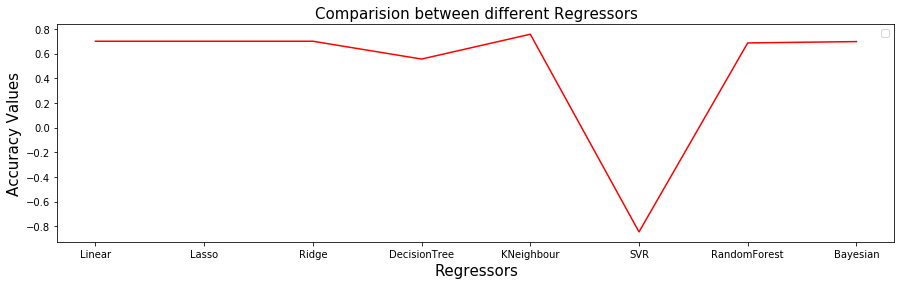

In [54]:
plt.figure(figsize=(15,4))
plt.plot(Regressors,R2_Score, color = 'Red')

plt.title('Comparision between different Regressors',fontsize=15)
plt.xlabel('Regressors',fontsize=15)
plt.ylabel('Accuracy Values',fontsize=15)
plt.legend()
plt.show()


## KNeighbour Regressor is sutaible for Precipitation with accuracy of 75.69% followed by Bayesian Regressor with accuracy of 69.72%

In [55]:
precipitation2020=pd.read_csv("C:/Users/Abhishek Wagh/Desktop/MTech_Project/Sugarcane/Phase1/csv/Precipitation/precipitation2020pred.csv")

In [56]:
precipitation2020=precipitation2020.drop('Year',axis=1)

In [57]:
precipitation2020=precipitation2020.iloc[:,:].values

In [58]:
precipitation2020

array([[1.0000e+00, 0.0000e+00, 9.0000e-02],
       [2.0000e+00, 1.9864e+02, 0.0000e+00],
       [3.0000e+00, 2.3660e+01, 5.0000e-02],
       [4.0000e+00, 7.7930e+01, 1.0000e-01],
       [5.0000e+00, 4.4100e+00, 1.0700e+00],
       [6.0000e+00, 2.3342e+02, 4.0900e+00],
       [7.0000e+00, 1.3709e+02, 5.1700e+00],
       [8.0000e+00, 4.0580e+01, 4.5300e+00],
       [9.0000e+00, 1.9704e+02, 1.9800e+00],
       [1.0000e+01, 1.2480e+02, 7.4000e-01],
       [1.1000e+01, 1.7290e+01, 4.4000e-01],
       [1.2000e+01, 2.6800e+00, 1.0000e-02]])

In [59]:
precipitation2020_pred=[]

In [60]:
#Using Kneighbour regressor for prediction
precipitation2020_pred=kn.predict(precipitation2020)

In [61]:
precipitation2020_pred

array([0.0000e+00, 1.5806e+02, 1.4160e+01, 3.5890e+01, 8.0600e+00,
       1.5806e+02, 1.0436e+02, 4.3100e+00, 1.5806e+02, 1.0436e+02,
       1.0000e-02, 1.0000e-02])

In [62]:
#Predicting for 2020
preci_data=pd.DataFrame(data=precipitation2020_pred)
preci_data

,0
0,0.00
1,158.06
2,14.16
3,35.89
4,8.06
5,158.06
6,104.36
7,4.31
8,158.06
9,104.36


In [63]:
#Exporting the predictions of 2020 into csv file
preci_data.to_csv(r"C:\Users\Abhishek Wagh\Desktop\MTech_Project\Sugarcane\Phase1\csv\Precipitation\2020precip.csv")
